# Blog Code

## Import packages

In [1]:
import requests
from bs4 import BeautifulSoup 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd

## Web Scraping:
### HIV Data

In [2]:
HIV_data = []

url = 'https://en.wikipedia.org/wiki/List_of_countries_by_HIV/AIDS_adult_prevalence_rate'

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Find the table with the class 'wikitable sortable'
table = soup.find('table', {'class': 'wikitable sortable static-row-numbers'})

# Extract data from the table
rows = table.find_all('tr')  # Find all rows in the table

for row in rows[1:]:
    # Extract data from each cell in the row
    cells = row.find_all(['th', 'td'])
    row_data = [cell.get_text(strip=True) for cell in cells]
    
    # Append row data to HIV_data
    HIV_data.append(row_data)


# Extract headers from the first row
headers = [header.get_text(strip=True) for header in rows[0].find_all('th')]

# Convert HIV_data into a pandas DataFrame
HIV_df = pd.DataFrame(HIV_data, columns=headers)

# rename some columns
HIV_df.rename(columns={'Country/Region': 'Country'}, inplace=True)
HIV_df.rename(columns={'Adult prevalenceof HIV/AIDS[1]': 'Adult prevalenceof HIV/AIDS'}, inplace=True)
HIV_df.rename(columns={'Annual deathsfrom HIV/AIDS[3]': 'Annual deathsfrom HIV/AIDS'}, inplace=True)
HIV_df.rename(columns={'Year of estimate': 'Year'}, inplace=True)



display(HIV_df)

,Country,Adult prevalenceof HIV/AIDS,Number of peoplewith HIV/AIDS,Annual deathsfrom HIV/AIDS,Year
0,Eswatini,28.30%,"240,000","3,000",2024
1,Lesotho,24.10%,"403,000","5,380",2024
2,Botswana,22.60%,"398,500","5,240",2024
3,Zimbabwe,22.10%,"1,660,000","25,600",2024
4,South Africa,14%,"9,230,000","77,000",2024
...,...,...,...,...,...
181,Mongolia,-,"2,500",-,2024
182,British Virgin Islands,-,48,-,2024
183,American Samoa,-,110,-,2023
184,Nauru,-,270,-,2024


### Population Data

In [3]:
Pop_data = []

url = 'https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population'

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Find the table with the class 'wikitable sortable'
table = soup.find('table',
                  {'class': 'wikitable sortable sticky-header sort-under mw-datatable col2left col6left'})

# Extract data from the table
rows = table.find_all('tr')  # Find all rows in the table



for row in rows[1:]:
    # Extract data from each cell in the row
    cells = row.find_all(['th', 'td'])
    row_data = [cell.get_text(strip=True) for cell in cells]
    
    # Append row data to HIV_data
    Pop_data.append(row_data)



# Extract headers from the first row
headers = [header.get_text(strip=True) for header in rows[0].find_all('th')]

# Convert HIV_data into a pandas DataFrame
Pop_df = pd.DataFrame(Pop_data, columns=headers)

# remove unwanted columns
Pop_df = Pop_df.drop(columns=['Date' , '' , '% ofworld', 'Source (official or fromtheUnited Nations)'])

# rename the country column
Pop_df.rename(columns={'Location': 'Country'}, inplace=True)

display(Pop_df)

,Country,Population
0,World,"8,098,995,000"
1,China,"1,409,670,000"
2,"1,392,329,000",17.2%
3,United States,"335,893,238"
4,Indonesia,"279,118,866"
...,...,...
236,Niue,"1,689"
237,Tokelau(NZ),"1,647"
238,Vatican City,764
239,Cocos (Keeling) Islands(Australia),593


### Merge the two DataFrames

In [4]:

# Merge the dataframes based on the 'Country' column
merged_df = pd.merge(HIV_df, Pop_df, on='Country', how='inner')


# Iterate over each column and remove unwanted characters
for column in merged_df.columns:
    if merged_df[column].dtype == 'object':  # Check if the column contains strings
        merged_df[column] = merged_df[column].str.replace(',', '').str.replace(' ', '') .str.replace('%','')
        merged_df[column] = merged_df[column].str.replace(r'([a-z])([A-Z])', r'\1 \2', regex=True)

        
        
# rename a heading
merged_df.rename(columns={'Adult prevalenceof HIV/AIDS': '% of adults with HIV/AIDS'}, inplace=True)


for column in merged_df.columns:
    if merged_df[column].dtype == 'object':  # Check if the column contains strings
        merged_df[column] = merged_df[column].str.split('.').str[0]

        

#merged_df.set_index('Country', inplace=True)




display(merged_df)

,Country,% of adults with HIV/AIDS,Number of peoplewith HIV/AIDS,Annual deathsfrom HIV/AIDS,Year,Population
0,Eswatini,28,240000,3000,2024,1223362
1,Lesotho,24,403000,5380,2024,2306000
2,Botswana,22,398500,5240,2024,2410338
3,Zimbabwe,22,1660000,25600,2024,15178979
4,South Africa,14,9230000,77000,2024,62027503
...,...,...,...,...,...,...
157,Greece,-,1100,-,2024,10413982
158,Vanuatu,-,325,-,2023,301295
159,Mongolia,-,2500,-,2024,3457548
160,Nauru,-,270,-,2024,11680


### HIV Time Data

https://ourworldindata.org/hiv-aids


In [5]:
# https://ourworldindata.org/hiv-aids


# Read the CSV file into a DataFrame
HIV_deaths_df = pd.read_csv('deaths-from-aids.csv')

# Print the DataFrame
display(HIV_deaths_df)


,Entity,Code,Year,Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Percent)
0,Afghanistan,AFG,1990,0.02
1,Afghanistan,AFG,1991,0.02
2,Afghanistan,AFG,1992,0.02
3,Afghanistan,AFG,1993,0.02
4,Afghanistan,AFG,1994,0.03
...,...,...,...,...
6835,Zimbabwe,ZWE,2015,21.96
6836,Zimbabwe,ZWE,2016,20.77
6837,Zimbabwe,ZWE,2017,19.29
6838,Zimbabwe,ZWE,2018,17.56


### World Data

In [6]:
World_Data = []

url = 'https://en.wikipedia.org/wiki/HIV/AIDS_in_Africa'

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Find all tables with the class 'wikitable sortable'
tables = soup.find_all('table', {'class': 'sortable wikitable'})


    # Get the second table (indexing starts from 0)
table = tables[0]

# Extract data from the table
rows = table.find_all('tr')  # Find all rows in the table

for row in rows[1:]:
    # Extract data from each cell in the row
    cells = row.find_all(['th', 'td'])
    row_data = [cell.get_text(strip=True) for cell in cells]

    # Append row data to HIV_data
    World_Data.append(row_data)

# Extract headers from the first row
headers = [header.get_text(strip=True) for header in rows[0].find_all('th')]

# Convert HIV_data into a pandas DataFrame
World_df = pd.DataFrame(World_Data, columns=headers)




# remove % signs and commas
for column in World_df.columns:
    if World_df[column].dtype == 'object':  # Check if the column contains strings
        World_df[column] = World_df[column].str.replace('%','').str.replace(',','')


# rename some columns
World_df.rename(columns={'Adult HIV prevalence(ages 15–49)[13]': 'Adult HIV % (ages 15–49)'}, inplace=True)
World_df.rename(columns={'Persons livingwith HIV[13]': 'Persons livingwith HIV'}, inplace=True)
World_df.rename(columns={'AIDS deaths, annual[13]': 'Anual Deaths from AIDS'}, inplace=True)
World_df.rename(columns={'New HIVinfections, annual[3]': 'Anual New HIV Infections'}, inplace=True)

#World_df.set_index('World region', inplace=True)

World_df['Adult HIV % (ages 15–49)'] = World_df['Adult HIV % (ages 15–49)'].astype(float)

display(World_df)

,World region,Adult HIV % (ages 15–49),Persons livingwith HIV,Anual Deaths from AIDS,Anual New HIV Infections
0,Worldwide,0.8,34000000,1700000,2500000
1,Sub-Saharan Africa,4.9,23500000,1200000,1800000
2,South and Southeast Asia,0.3,4000000,250000,280000
3,Eastern Europe and Central Asia,1.0,1400000,92000,140000
4,East Asia,0.1,830000,59000,89000
5,Latin America,0.4,1400000,54000,83000
6,Middle East and North Africa,0.2,300000,23000,37000
7,North America,0.6,1400000,21000,51000
8,Caribbean,1.0,230000,10000,13000
9,Western and Central Europe,0.2,900000,7000,30000


## Plots
### Plot Inspeting World HIV/AIDs Prevelence

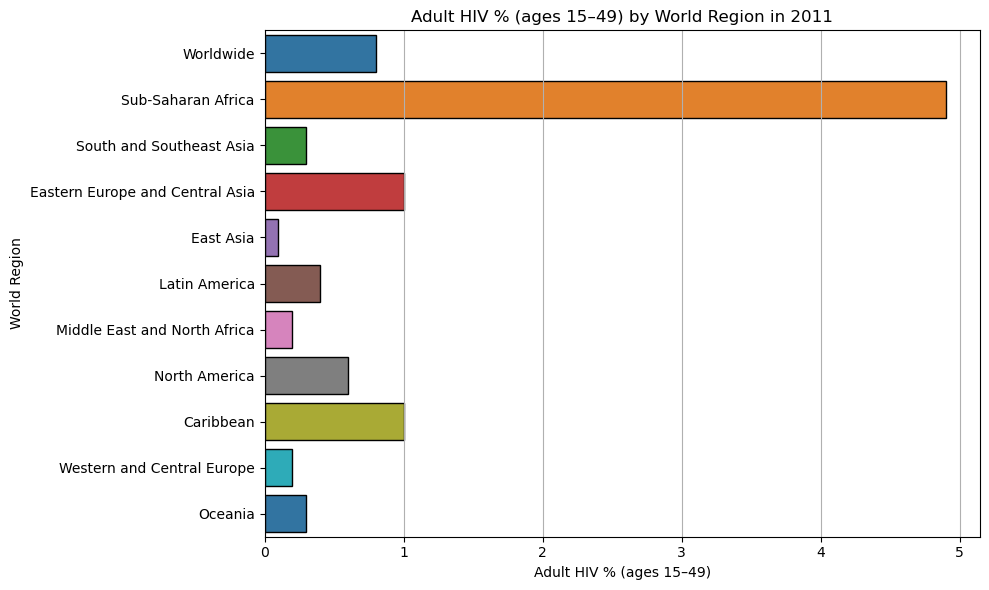

In [18]:


# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=World_df, 
            x='Adult HIV % (ages 15–49)', 
            y='World region', 
            palette='tab10',
            edgecolor='black')

plt.title('Adult HIV % (ages 15–49) by World Region in 2011')
plt.xlabel('Adult HIV % (ages 15–49)')
plt.ylabel('World Region')
plt.grid(axis='x')
plt.tight_layout()
plt.savefig(r'Images/World_HIV_plot.png')
plt.show()
#tab10

### Plot Inspecting African Countries

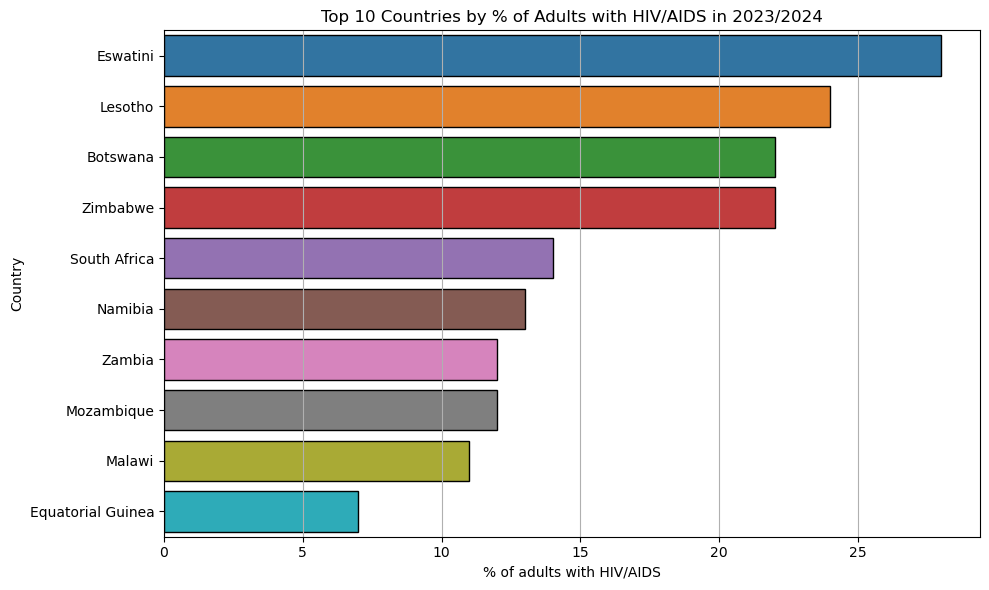

In [19]:
top_ten = merged_df.head(10)


# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=top_ten, 
            x=top_ten['% of adults with HIV/AIDS'].astype(float),  # Convert the '% of adults with HIV/AIDS' column to numeric
            y='Country', 
            palette='tab10',
            edgecolor='black')

plt.title('Top 10 Countries by % of Adults with HIV/AIDS in 2023/2024')
plt.xlabel('% of adults with HIV/AIDS')
plt.ylabel('Country')
plt.grid(axis='x')
plt.tight_layout()
plt.savefig(r'Images/Countries_HIV_plot.png')
plt.show()



### African Countries as a Map

C:\Users\15kof\AppData\Local\Temp\ipykernel_11956\3884244809.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Country'] = df['Country'].replace({'Eswatini': 'eSwatini'})
C:\Users\15kof\AppData\Local\Temp\ipykernel_11956\3884244809.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
C:\Users\15kof\AppData\Local\Temp\ipykernel_11956\3884244809.py:20: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a project

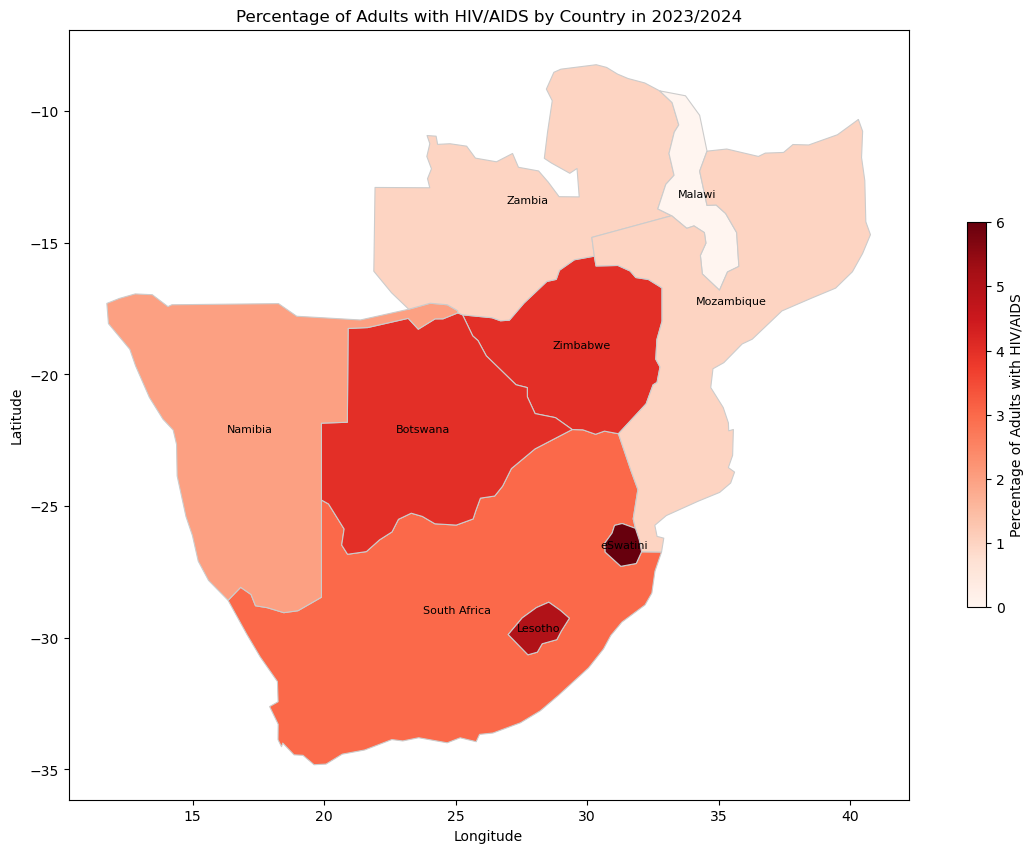

In [20]:

df = merged_df.head(10)
df['Country'] = df['Country'].replace({'Eswatini': 'eSwatini'})

# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the world map with the data DataFrame
world = world.merge(df, how='left', left_on='name', right_on='Country')


# Plotting
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot the world map
world.plot(column='% of adults with HIV/AIDS', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8')

# Add labels for countries in df
# Filter world DataFrame to include only countries present in df
world_to_label = world[world['name'].isin(df['Country'])]
for x, y, label in zip(world_to_label.geometry.centroid.x, world_to_label.geometry.centroid.y, world_to_label['Country']):
    ax.text(x, y, label, fontsize=8, ha='center', va='center', color='black')

# Add a colorbar
cbar = plt.colorbar(ax.collections[0], ax=ax, orientation='vertical', shrink=0.5)
cbar.set_label('Percentage of Adults with HIV/AIDS')

# Add titles and labels
plt.title('Percentage of Adults with HIV/AIDS by Country in 2023/2024')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.savefig(r'Images/Map_HIV_plot.png')

# Show the plot
plt.show()


maybe look at GDP breakdown on same map

here:
    https://en.wikipedia.org/wiki/Economy_of_Africa

### HIV/AIDs Time Plot


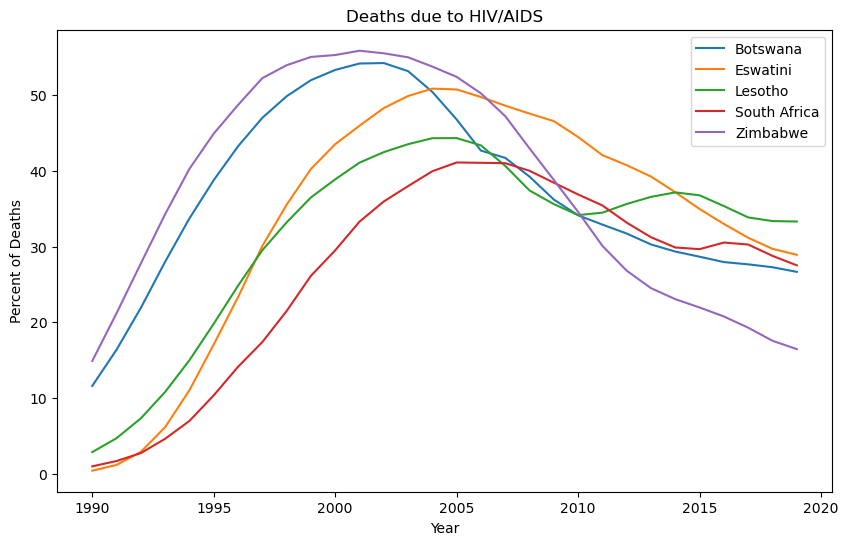

In [38]:
# Group data by 'Entity' and 'Year' and plot using matplotlib
plt.figure(figsize=(10, 6))

# Select only the countries you want to plot
selected_countries = top_ten['Country'].head(5)
#selected_countries = ['Botswana', 'Uganda']



df_selected = HIV_deaths_df[HIV_deaths_df['Entity'].isin(selected_countries)]


# set colours
sns.set_palette('tab10')

for entity, group in df_selected.groupby('Entity'):
    plt.plot(group['Year'], 
             group['Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Percent)'], 
             label=entity)

    
plt.savefig(r'Images/HIV_deaths_time_plot.png')

plt.title('Deaths due to HIV/AIDS')
plt.xlabel('Year')
plt.ylabel('Percent of Deaths')
plt.legend()
plt.show()

### Regression Model / Random Forest

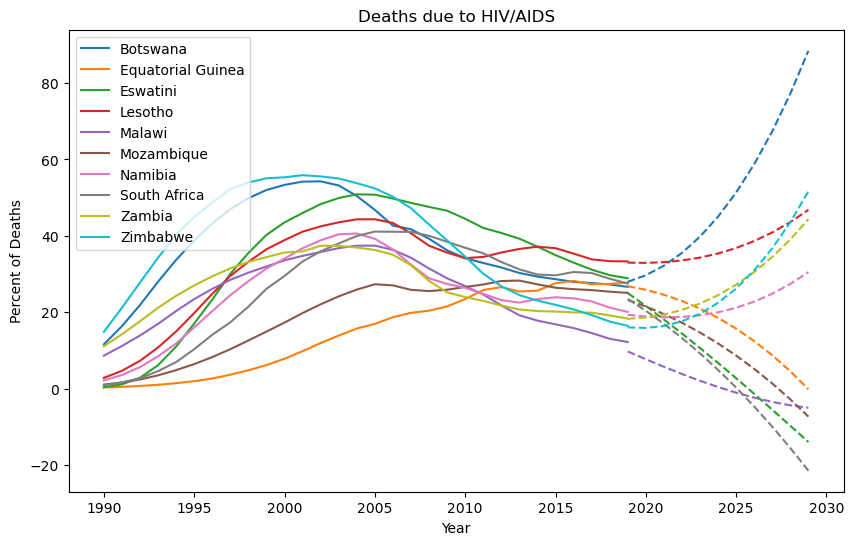

In [11]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.cm as cm

# Create an empty DataFrame to store the predictions
future_predictions = pd.DataFrame(columns=['Entity', 'Year', 'Predicted_Deaths_Percent'])

# Select only the countries you want to plot
df_selected = HIV_deaths_df[HIV_deaths_df['Entity'].isin(top_ten['Country'])]

# Define the degree of the polynomial
degree = 3  # You can adjust this as needed

# Set up a colormap
colors = cm.tab10(np.linspace(0, 1, len(selected_countries)))

# Perform polynomial regression for each country
for idx, (entity, group) in enumerate(df_selected.groupby('Entity')):
    # Extracting features (Year) and target (Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Percent))
    X = group['Year'].values.reshape(-1, 1)
    y = group['Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Percent)'].values

    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)

    # Creating a polynomial regression model
    model = LinearRegression()
    model.fit(X_poly, y)

    # Predict future values
    future_years = np.array(range(df_selected['Year'].max(), 2030)).reshape(-1, 1)
    future_years_poly = poly_features.transform(future_years)
    future_predictions_df = pd.DataFrame({
        'Entity': [entity] * len(future_years),
        'Year': future_years.flatten(),
        'Predicted_Deaths_Percent': model.predict(future_years_poly).flatten()
    })

    future_predictions = pd.concat([future_predictions, future_predictions_df], ignore_index=True)

# Plotting the original data and predictions
plt.figure(figsize=(10, 6))

for idx, (entity, group) in enumerate(df_selected.groupby('Entity')):
    plt.plot(group['Year'], group['Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Percent)'], label=entity)

for idx, (entity, group) in enumerate(future_predictions.groupby('Entity')):
    plt.plot(group['Year'], group['Predicted_Deaths_Percent'], linestyle='--', color=colors[idx])

    # set colours
sns.set_palette('tab10')

plt.title('Deaths due to HIV/AIDS')
plt.xlabel('Year')
plt.ylabel('Percent of Deaths')
plt.legend()
plt.show()


,Entity,Code,Year,Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Percent)
0,Afghanistan,AFG,1990,0.02
1,Afghanistan,AFG,1991,0.02
2,Afghanistan,AFG,1992,0.02
3,Afghanistan,AFG,1993,0.02
4,Afghanistan,AFG,1994,0.03
...,...,...,...,...
6835,Zimbabwe,ZWE,2015,21.96
6836,Zimbabwe,ZWE,2016,20.77
6837,Zimbabwe,ZWE,2017,19.29
6838,Zimbabwe,ZWE,2018,17.56
